# WORD COUNTING

In [2]:
text="Theseus, Now faire'v Hippolit,a our nuptiall houre Drawes on apace foure happy daies bring in Another Moon but oh me thinkes how slow This old Moon wanes She lingers my desires Like to a Stepdame or a Dowager Long withering out a yong mans reuennew"

def count_words(text):
	"""
	Count the number of times each word occurs in text (str). Return dictionary whre keys are unique words and values are word counts
	"""
	text = text.lower()
	skips = [".",",",";",":","'",'"']
	for ch in skips:
		text = text.replace(ch,"")
	word_counts = {}
	for word in text.split(" "):
		#known word
		if word in word_counts:
			word_counts[word]+=1
		#unknown word
		else:
			word_counts[word]=1
	return word_counts

In [3]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [4]:
from collections import Counter
def count_words_fast(text):
	"""
	Count the number of times each word occurs in text (str). Return dictionary whre keys are unique words and values are word counts
	"""
	text = text.lower()
	skips = [".",",",";",":","'",'"']
	for ch in skips:
		text = text.replace(ch,"")
	word_counts = Counter(text.split(" "))
	return word_counts

count_words_fast(text)


Counter({'theseus': 1,
         'now': 1,
         'fairev': 1,
         'hippolita': 1,
         'our': 1,
         'nuptiall': 1,
         'houre': 1,
         'drawes': 1,
         'on': 1,
         'apace': 1,
         'foure': 1,
         'happy': 1,
         'daies': 1,
         'bring': 1,
         'in': 1,
         'another': 1,
         'moon': 2,
         'but': 1,
         'oh': 1,
         'me': 1,
         'thinkes': 1,
         'how': 1,
         'slow': 1,
         'this': 1,
         'old': 1,
         'wanes': 1,
         'she': 1,
         'lingers': 1,
         'my': 1,
         'desires': 1,
         'like': 1,
         'to': 1,
         'a': 3,
         'stepdame': 1,
         'or': 1,
         'dowager': 1,
         'long': 1,
         'withering': 1,
         'out': 1,
         'yong': 1,
         'mans': 1,
         'reuennew': 1})

In [5]:
count_words(text) is count_words_fast(text)

False

# Reading a Book

In [6]:
def read_book(title_path):
	"""Read a book and return it as a string"""
	with open(title_path, "r",encoding="utf8") as current_file:
		text= current_file.read()
		text = text.replace("\n","").replace("\r","")
	return text

In [8]:
text = read_book("Books_EngFr/English/shakespeare/Romeo and Juliet.txt")

In [9]:
len(text)


169275

In [12]:
ind = text.find("What's in a name?")
sample_text = text[ind: ind +100]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo w"

## Computing word Frequency Statistics

In [13]:
def word_stats(word_counts):
	""""Return number of unique words and word frequencies"""
	num_unique =len(word_counts)
	counts = word_counts.values()
	return(num_unique,counts)
	

In [14]:
word_counts= count_words(text)

(num_unique,counts) = word_stats(word_counts)

In [15]:
num_unique


5118

In [17]:
sum(counts)

40776

In [19]:
text = read_book("Books_EngFr/English/shakespeare/Romeo and Juliet.txt")
word_counts= count_words(text)
(num_unique,counts) = word_stats(word_counts)
print(num_unique,sum(counts))


text_german = read_book("Books_GerPort/German/shakespeare/Romeo und Julia.txt")
word_counts_german= count_words(text_german)
(num_unique_german,counts_german) = word_stats(word_counts_german)
print(num_unique_german,sum(counts_german))


5118 40776
7527 20311


## Reading Multiple files

In [33]:
import pandas as pd
table = pd.DataFrame(columns = ("name","age"))
table.loc[1] = "James",22
table.loc[2] = "Jess",32
table

,name,age
1,James,22
2,Jess,32


In [37]:
import os
book_dir = "./books"
import pandas as pd
stats  = pd.DataFrame(columns=("Language", "Author", "Title", "Lenght", "Unique"))
title_num  = 1
os.listdir(book_dir)
for language in os.listdir(book_dir):
	for author in os.listdir(book_dir + "/" + language):
		for title in os.listdir(book_dir + "/" + language + "/" + author):
			inputfile = book_dir + "/" + language + "/" + author + "/" + title
			print(inputfile)
			text = read_book(inputfile)
			(num_unique,counts) =word_stats(count_words(text))
			stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
			title_num+=1

./books/French/de Maupassant/Œuvres complètes de Guy de Maupassant.txt
./books/French/de Maupassant/Contes de la Becasse.txt
./books/French/de Maupassant/L'inutile beautÇ.txt
./books/French/de Maupassant/La Main Gauche.txt
./books/French/de Maupassant/Claire de Lune.txt
./books/French/de Maupassant/Le Horla.txt
./books/French/de Maupassant/Boule de Suif.txt
./books/French/de Maupassant/La Maison Tellier.txt
./books/French/de Maupassant/La petite roque.txt
./books/French/sand/Mattea.txt
./books/French/sand/Oeuvres illustrÇes de George Sand.txt
./books/French/sand/cora.txt
./books/French/sand/L' Orco.txt
./books/French/sand/Le poâme de Myrza.txt
./books/French/sand/La Coupe; Lupo Liverani; Le Toast; Garnier; Le Contrebandier; La Ràverie Ö Paris.txt
./books/French/sand/Metella.txt
./books/French/sand/La Marquise.txt
./books/French/sand/Jacques le fataliste et son maåtre.txt
./books/French/sand/Le Piccinino.txt
./books/French/sand/Pauline.txt
./books/French/chevalier/Les derniers Iroquois.

In [38]:
stats

,Language,Author,Title,Lenght,Unique
1,French,De maupassant,Œuvres complètes de Guy de Maupassant,54772,15028
2,French,De maupassant,Contes de la Becasse,34723,10210
3,French,De maupassant,L'inutile beautÇ,37840,10781
4,French,De maupassant,La Main Gauche,33481,9983
5,French,De maupassant,Claire de Lune,25975,8076
...,...,...,...,...,...
98,German,Schiller,Wallensteins Lager,15443,4379
99,German,Schiller,Die Jungfrau von Orleans,24181,8806
100,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,10371
101,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu machen",20450,6159


In [36]:
stats.head()
stats.tail()

,Language,Author,Title,Lenght,Unique
98,German,schiller,Wallensteins Lager.txt,15443,4379
99,German,schiller,Die Jungfrau von Orleans.txt,24181,8806
100,German,schiller,Die Verschwîrung des Fiesco zu Genua.txt,31128,10371
101,German,schiller,"Der Parasit, oder die Kunst, sein GlÅck zu mac...",20450,6159
102,German,schiller,"Turandot, Prinzessin von China.txt",21441,7550


## Plotting Book Statistics

In [49]:
stats.Lenght

1      54772
2      34723
3      37840
4      33481
5      25975
       ...  
98     15443
99     24181
100    31128
101    20450
102    21441
Name: Lenght, Length: 102, dtype: int64

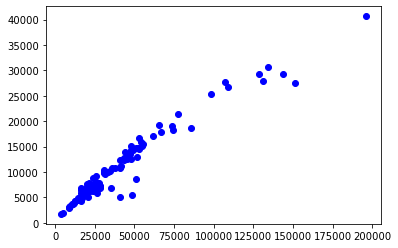

In [61]:
import matplotlib.pyplot as plt
plt.plot(stats["Lenght"], stats.Unique, "bo")

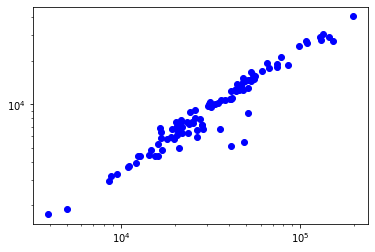

In [54]:
plt.loglog(stats.Lenght, stats.Unique, "bo")


In [58]:
stats[stats.Language=="English"]

,Language,Author,Title,Lenght,Unique
62,English,Shakespeare,Othello,26590,5898
63,English,Shakespeare,Hamlet,28551,6776
64,English,Shakespeare,The Merchant of Venice,20949,4978
65,English,Shakespeare,Romeo and Juliet,40776,5118
66,English,Shakespeare,Richard III,48315,5449
67,English,Shakespeare,Macbeth,16874,4780
68,English,Shakespeare,A Midsummer Night's Dream,16103,4345


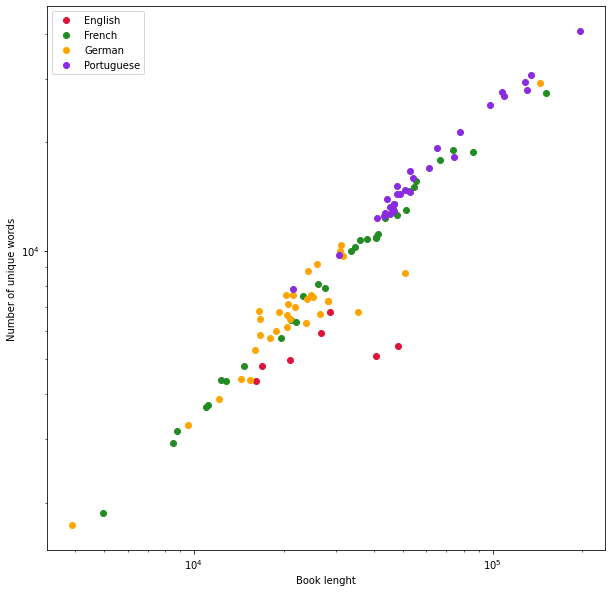

In [59]:
plt.figure(figsize = (10,10))
subset = stats[stats.Language=="English"]
plt.loglog(subset.Lenght,subset.Unique, "o", label="English", color="crimson")

subset = stats[stats.Language=="French"]
plt.loglog(subset.Lenght,subset.Unique, "o", label="French", color="forestgreen")

subset = stats[stats.Language=="German"]
plt.loglog(subset.Lenght,subset.Unique, "o", label="German", color="orange")

subset = stats[stats.Language=="Portuguese"]
plt.loglog(subset.Lenght,subset.Unique, "o", label="Portuguese", color="blueviolet")

plt.legend()
plt.xlabel("Book lenght")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")